In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [26]:
mag_d = pd.read_csv('./magazine/final/magazine_d_stickword.csv', encoding = 'utf-8', sep ='|')

In [27]:
mag_d['ADFN'] = mag_d['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [28]:
mag_d['ADFN'].head()

0    [빈티지, 패션, 좋, 느, 좋, 당시, 사랑, 사랑, 나의, 물건, 새롭, 사랑,...
1    [요즘, 주식, 친구, 과의, 대화, 빼놓, 주제, 코로나, 겪, 늘어나, 불안감,...
2    [나이, 조, 덜, 시리즈, 역대, 급, 평가, 에어, DIOR, 부르, 값, 한정...
3                    [DIOR, LADY, DIOR, DIOR, 아무르, 미니]
4    [실크, 슬리브리스, 블랙, 와이드, 팬츠, 김, 룡, HOMME, 블랙, 부츠, ...
Name: ADFN, dtype: object

### top50 리스트 생성

In [31]:
top500 = pd.read_csv('./magazine/final/d_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8')

In [32]:
top500

,word,count
0,DIOR,4896
1,컬렉션,1265
2,패션,1236
3,브랜드,753
4,드레스,728
...,...,...
495,심플,56
496,느껴지,56
497,달리,56
498,화려,56


In [33]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['DIOR', '컬렉션', '패션', '브랜드', '드레스', '쇼', '디자이너', '여성', '룩', '장식', '하우스', 'MARIA', '컬러', 'DESIGN', '백', '티', '모델', '디렉터', '스타일', '파리', '시즌', 'CHRISTIAN', '재킷', '소재', 'LADY', 'COUTURE', '영감', '작품', 'CREATIVE', '블랙', '팬츠', 'HOMME', '영화', '화이트', '스커트', '새롭', '옷', '세계', '프랑스', 'JONES', '아이템', '배우', 'LAURENT', 'KIM', '남성복', '코트', '완성', '라인', '로고', '럭셔리']


### top100

In [34]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['DIOR', '컬렉션', '패션', '브랜드', '드레스', '쇼', '디자이너', '여성', '룩', '장식', '하우스', 'MARIA', '컬러', 'DESIGN', '백', '티', '모델', '디렉터', '스타일', '파리', '시즌', 'CHRISTIAN', '재킷', '소재', 'LADY', 'COUTURE', '영감', '작품', 'CREATIVE', '블랙', '팬츠', 'HOMME', '영화', '화이트', '스커트', '새롭', '옷', '세계', '프랑스', 'JONES', '아이템', '배우', 'LAURENT', 'KIM', '남성복', '코트', '완성', '라인', '로고', '럭셔리', '슈트', '아티스트', '패턴', '사랑', '열리', '좋', '가죽', '선택', '봄', '셔츠', '여름', '새', 'SADDLE', '데님', '미국', '프린트', '작업', '의상', '가방', '런웨이', '웨어', '협업', '무대', '유명', '처음', '전시', '뷰티', '제작', '슈즈', '티셔츠', '앤', '착용', '아트', 'JEWERLY', '시몬스', '따르', '실루엣', '크루즈', '패션쇼', '푸', '엘', '패션계', '루', '위크', '꽃', '장', 'LVMH', '커', nan, '이미지']


In [35]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500)

500
['DIOR', '컬렉션', '패션', '브랜드', '드레스', '쇼', '디자이너', '여성', '룩', '장식', '하우스', 'MARIA', '컬러', 'DESIGN', '백', '티', '모델', '디렉터', '스타일', '파리', '시즌', 'CHRISTIAN', '재킷', '소재', 'LADY', 'COUTURE', '영감', '작품', 'CREATIVE', '블랙', '팬츠', 'HOMME', '영화', '화이트', '스커트', '새롭', '옷', '세계', '프랑스', 'JONES', '아이템', '배우', 'LAURENT', 'KIM', '남성복', '코트', '완성', '라인', '로고', '럭셔리', '슈트', '아티스트', '패턴', '사랑', '열리', '좋', '가죽', '선택', '봄', '셔츠', '여름', '새', 'SADDLE', '데님', '미국', '프린트', '작업', '의상', '가방', '런웨이', '웨어', '협업', '무대', '유명', '처음', '전시', '뷰티', '제작', '슈즈', '티셔츠', '앤', '착용', '아트', 'JEWERLY', '시몬스', '따르', '실루엣', '크루즈', '패션쇼', '푸', '엘', '패션계', '루', '위크', '꽃', '장', 'LVMH', '커', nan, '이미지', '그룹', '핑크', '비통', '연기', '여자', '가을', '해석', 'VALENTINO', '다이', '골드', '라프', '느낌', '스타', '메', '패', '통', '담', '영국', '한편', '시대', '눈', '순간', '촬영', '데뷔', '트렌드', '이비', '당시', '백은', '자리', '방식', '그렇', '레드', '참석', '돋보이', '올해', '끌', '점', '캠페인', '주목', '파', '뉴욕', '공개', '클래식', '매장', '남성', '얻', 'COM', '반', '스트리트', '블', '분위기', '아름답', '겨울', '찾', '자연', 

### top50만 남기기

In [36]:
len(mag_d)

1759

In [37]:
top50_word = []
for i in range(len(mag_d)):
    w=[]
    for word in mag_d.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [38]:
top100_word = []
for i in range(len(mag_d)):
    w=[]
    for word in mag_d.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [39]:
top500_word = []
for i in range(len(mag_d)):
    w=[]
    for word in mag_d.loc[i, 'ADFN']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

In [40]:
top500

,word,count
0,DIOR,4896
1,컬렉션,1265
2,패션,1236
3,브랜드,753
4,드레스,728
...,...,...
495,심플,56
496,느껴지,56
497,달리,56
498,화려,56


### item 남기기

In [41]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [42]:
# item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [43]:
# top100_not_item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [44]:
# len(top100_not_item_word)

In [45]:
# top100_not_item_word[1]

### top100이면서 common이 아닌 것

In [46]:
common = ['브랜드',
 '쇼',
 '모델',
 '장식',
 '드레스',
 '파리',
 '여성',
 '스타일',
 '컬러',
 '디자이너',
 '블랙',
 '재킷',
 '아이템',
 '옷',
 '디렉터',
 '팬츠']


In [47]:
# top100_not_common_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in common:
#                 w.append(word)
#     top100_not_common_word.append(w)

### top100이면서 common/item이 아닌 것

In [48]:
# top100_not_common_item_word = []
# for i in range(len(mag_ch)):
#     w=[]
#     for word in mag_ch.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in common:
#                 if word not in item:
#                     w.append(word)
#     top100_not_common_item_word.append(w)

In [49]:
len(top50_word)

1759

In [50]:
top50_word[:5]

[['패션',
  '새롭',
  '패션',
  '옷',
  '컬렉션',
  '재킷',
  '재킷',
  '재킷',
  '라인',
  '팬츠',
  '라인',
  'DIOR',
  '라인'],
 ['새롭',
  '세계',
  '세계',
  'DIOR',
  '패션',
  '브랜드',
  '브랜드',
  '시즌',
  '브랜드',
  'DIOR',
  '브랜드',
  '패션',
  '브랜드',
  '럭셔리',
  '브랜드',
  '럭셔리',
  '브랜드',
  '브랜드'],
 ['DIOR', '패션', '하우스', '브랜드', 'DIOR', '작품', 'DIOR', '화이트', '컬러', 'DIOR'],
 ['DIOR', 'LADY', 'DIOR', 'DIOR'],
 ['블랙', '팬츠', 'HOMME', '블랙', 'DIOR', 'DIOR']]

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [51]:
# 어프라이어리(Apriori)
from apyori import apriori

In [52]:
top50_word[0]

['패션',
 '새롭',
 '패션',
 '옷',
 '컬렉션',
 '재킷',
 '재킷',
 '재킷',
 '라인',
 '팬츠',
 '라인',
 'DIOR',
 '라인']

In [59]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
92,"(DIOR, 컬렉션)",0.311541,"[((), (DIOR, 컬렉션), 0.3115406480955088, 1.0), (...",2
96,"(DIOR, 패션)",0.290506,"[((), (DIOR, 패션), 0.2905059693007391, 1.0), ((...",2
68,"(DIOR, 브랜드)",0.224559,"[((), (DIOR, 브랜드), 0.2245594087549744, 1.0), (...",2
60,"(DIOR, 드레스)",0.189881,"[((), (DIOR, 드레스), 0.18988061398521888, 1.0), ...",2
65,"(DIOR, 룩)",0.186470,"[((), (DIOR, 룩), 0.18646958499147243, 1.0), ((...",2
94,"(DIOR, 티)",0.181922,"[((), (DIOR, 티), 0.18192154633314384, 1.0), ((...",2
77,"(DIOR, 쇼)",0.175668,"[((), (DIOR, 쇼), 0.17566799317794202, 1.0), ((...",2
62,"(DIOR, 디자이너)",0.173962,"[((), (DIOR, 디자이너), 0.1739624786810688, 1.0), ...",2
89,"(장식, DIOR)",0.171120,"[((), (장식, DIOR), 0.17111995451961343, 1.0), (...",2
61,"(DIOR, 디렉터)",0.162024,"[((), (DIOR, 디렉터), 0.16202387720295622, 1.0), ...",2


### networkx 그래프 정의

In [60]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [61]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [62]:
pos = nx.spring_layout(G)

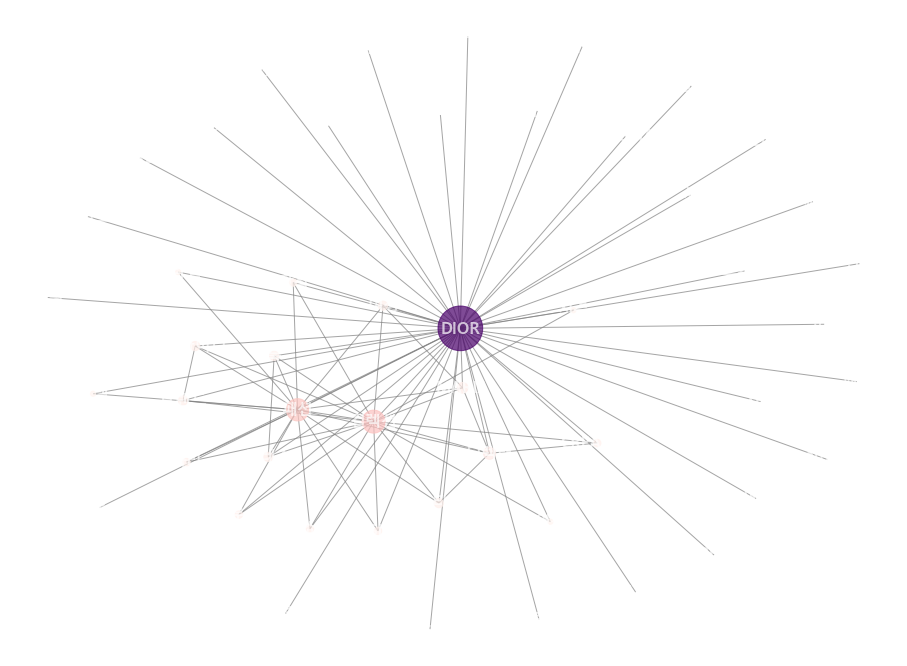

In [63]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_dior_top500_min07-w.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [64]:
['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']

['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']